In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
from category_encoders import BinaryEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [5]:
from kydavra import PValueSelector
from kydavra import BregmanDivergenceSelector
from kydavra import JensenShannonSelector

In [6]:
import shap
shap.initjs()

In [7]:
df = pd.read_csv('data.csv')

In [8]:
df

,Course Title,Rating,Level,Schedule,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url,Duration to complete (Approx.),Number of Review
0,Fashion as Design,4.8,Beginner level,Flexible schedule,Not specified,"Art History, Art, History, Creativity","Introduction, Heroes, Silhouettes, Coutures, L...","Anna Burckhardt, Paola Antonelli, Michelle Mil...",The Museum of Modern Art,Arts and Humanities,https://www.coursera.org/learn/fashion-design,20.0,2813
1,Modern American Poetry,4.4,Beginner level,Flexible schedule,Not specified,Not specified,"Orientation, Module 1, Module 2, Module 3, Mod...",Cary Nelson,University of Illinois at Urbana-Champaign,Arts and Humanities,https://www.coursera.org/learn/modern-american...,34.0,100
2,Pixel Art for Video Games,4.5,Beginner level,Flexible schedule,Not specified,Not specified,"Week 1: Introduction to Pixel Art, Week 2: Pix...","Andrew Dennis, Ricardo Guimaraes",Michigan State University,Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...,9.0,227
3,Distribución digital de la música independiente,0.0,Beginner level,Flexible schedule,Not specified,Not specified,"Semana 1, Semana 2, Semana 3, Semana 4",Eduardo de la Vara Brown.,SAE Institute México,Arts and Humanities,https://www.coursera.org/learn/distribucion-di...,8.0,0
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Flexible schedule,Students will be able to describe the blues as...,"Music, Chord, Jazz, Jazz Improvisation","Blues Progressions – Theory and Practice , Blu...",Dariusz Terefenko,University of Rochester,Arts and Humanities,https://www.coursera.org/learn/the-blues,11.0,582
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8365,Architecting with Google Kubernetes Engine: Pr...,4.9,Intermediate level,Flexible schedule,Not specified,Not specified,"Introducción al curso, Control de acceso y seg...",Google Cloud Training,Google Cloud,Social Sciences,https://www.coursera.org/learn/deploying-secur...,14.0,30
8366,Computational Thinking for K-12 Educators: Nes...,0.0,Beginner level,Flexible schedule,Not specified,"Education, want, Resource, Causality","Course Orientation, Nested If/Else Part 1, Nes...",Beth Simon,University of California San Diego,Social Sciences,https://www.coursera.org/learn/block-programmi...,11.0,0
8367,Cómo combinar y analizar datos complejos,0.0,Not specified,Flexible schedule,Not specified,Not specified,"Estimación básica, Modelos, Vinculación de reg...","Richard Valliant, Ph.D.","University of Maryland, College Park",Social Sciences,https://www.coursera.org/learn/data-collection...,9.0,0
8368,Architecting with Google Kubernetes Engine: Wo...,0.0,Intermediate level,Flexible schedule,Not specified,Not specified,"Introdução ao curso, Operações do Kubernetes, ...",Google Cloud Training,Google Cloud,Social Sciences,https://www.coursera.org/learn/deploying-workl...,19.0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8370 entries, 0 to 8369
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Course Title                    8370 non-null   object 
 1   Rating                          8370 non-null   float64
 2   Level                           8370 non-null   object 
 3   Schedule                        8370 non-null   object 
 4   What you will learn             8370 non-null   object 
 5   Skill gain                      8370 non-null   object 
 6   Modules                         8337 non-null   object 
 7   Instructor                      8282 non-null   object 
 8   Offered By                      8370 non-null   object 
 9   Keyword                         8370 non-null   object 
 10  Course Url                      8370 non-null   object 
 11  Duration to complete (Approx.)  8370 non-null   float64
 12  Number of Review                83

In [10]:
df.describe()

,Rating,Duration to complete (Approx.),Number of Review
count,8370.000000,8370.000000,8370.000000
mean,4.005974,29.245968,2044.256631
std,1.623430,39.899608,10265.366839
min,0.000000,1.000000,0.000000
25%,4.500000,10.000000,32.000000
50%,4.700000,16.000000,213.000000
75%,4.800000,32.000000,1025.000000
max,5.000000,480.000000,225830.000000


In [11]:
df.isnull().sum()  

Course Title                       0
Rating                             0
Level                              0
Schedule                           0
What you will learn                0
Skill gain                         0
Modules                           33
Instructor                        88
Offered By                         0
Keyword                            0
Course Url                         0
Duration to complete (Approx.)     0
Number of Review                   0
dtype: int64

##### The NaN values are in "Modules" and "Instructor" columns

In [12]:
# Counting the unique values of the columns

for column in df.columns:
    print(f'{column} : {df[column].nunique()}')

Course Title : 6081
Rating : 22
Level : 4
Schedule : 2
What you will learn : 3010
Skill gain : 3697
Modules : 5688
Instructor : 3524
Offered By : 395
Keyword : 10
Course Url : 6093
Duration to complete (Approx.) : 109
Number of Review : 1860


##### The columns with strings should be better analyzed, because there is a lot of text, and small deviation could create huge problems

In [13]:
def has_unsorted_duplicates(df_init, column_name):
    df = df_init.copy()

    # Function to sort and join elements, handling NaN values
    def sort_and_join(x):
        if pd.isnull(x):
            return np.nan
        else:
            return ','.join(sorted(x.split(', ')))
    
    # Apply the sorting function to the column
    df['sorted_' + column_name] = df[column_name].apply(sort_and_join)
    
    # Remove exact duplicates
    df = df.drop_duplicates(subset=column_name, keep=False)
    
    # Check for duplicates in the sorted strings
    duplicates = df[df.duplicated(subset='sorted_' + column_name, keep=False)]
    
    # If duplicates are found, return True, otherwise False
    if not duplicates.empty:
        return True
    else:
        return False
    
comma_separated_columns = ['What you will learn', 'Skill gain', 'Modules', 'Instructor', 'Offered By']

for column in comma_separated_columns:
    has_duplicates = has_unsorted_duplicates(df, column)
    if has_duplicates:
        print(f'Unsorted duplicates found in column {column}:')
    else:
        print(f'No unsorted duplicates found in column {column}')

No unsorted duplicates found in column What you will learn
Unsorted duplicates found in column Skill gain:
No unsorted duplicates found in column Modules
Unsorted duplicates found in column Instructor:
Unsorted duplicates found in column Offered By:


##### So the "Instructor" column contains unsorted duplicates, but for my own safety, I will sort them all

In [14]:
df_test = df.copy()

for column in comma_separated_columns:
    df_test[column] = df_test[column].apply(lambda x: np.nan if pd.isnull(x) else ','.join(sorted(x.split(', '))))

In [15]:
for column in comma_separated_columns:
    has_duplicates = has_unsorted_duplicates(df_test, column)
    if has_duplicates:
        print(f'Unsorted duplicates found in column {column}:')
    else:
        print(f'No unsorted duplicates found in column {column}')

No unsorted duplicates found in column What you will learn
No unsorted duplicates found in column Skill gain
No unsorted duplicates found in column Modules
No unsorted duplicates found in column Instructor
No unsorted duplicates found in column Offered By


In [16]:
for column in df.columns:
    print(f'{column} : {df[column].nunique()} => {df_test[column].nunique()}')

Course Title : 6081 => 6081
Rating : 22 => 22
Level : 4 => 4
Schedule : 2 => 2
What you will learn : 3010 => 3010
Skill gain : 3697 => 3694
Modules : 5688 => 5688
Instructor : 3524 => 3220
Offered By : 395 => 387
Keyword : 10 => 10
Course Url : 6093 => 6093
Duration to complete (Approx.) : 109 => 109
Number of Review : 1860 => 1860


##### Judging by the unique values in the columns, the problem with unsorted list is solved

##### Now let's try to remove the duplicates

In [17]:
# trying to remove the duplicates
print(df.shape[0])
df = df.drop_duplicates()
print(df.shape[0])

8370
8370


##### There are no exact duplicate

##### A url is basically a unique identifier for each course, beacause it is routed to the ip address that contains the page of the course, thus it can be used to identify unique columns

In [18]:
df_test["Course Url"].nunique()

6093

##### Nothing changed thus, there are no exact duplicates, thus the columns with the same "Course Url" should be further examined

In [19]:
# Identifying the urls of duplicate rows to analyze the differences
df_test["Course Url"].value_counts()

Course Url
https://www.coursera.org/learn/human-needs                                         6
https://www.coursera.org/learn/moral-politics                                      5
https://www.coursera.org/specializations/business-data-management-communication    5
https://www.coursera.org/specializations/data-analytics-business                   5
https://www.coursera.org/specializations/ai-healthcare                             5
                                                                                  ..
https://www.coursera.org/learn/healthcare-delivery-in-healthcare-organizations     1
https://www.coursera.org/learn/quality-improvement-in-healthcare-organizations     1
https://www.coursera.org/learn/healthsystems-policy-research                       1
https://www.coursera.org/learn/pop-health                                          1
https://www.coursera.org/projects/visualizing-static-networks-r                    1
Name: count, Length: 6093, dtype: int64

##### Based on the urls, there should be only **6093** rows

##### Let's print the row with the same url for a couple urls, to see what are the differences

In [20]:
display(df_test[df_test["Course Url"] == "https://www.coursera.org/learn/human-needs"])
display(df_test[df_test["Course Url"] == "https://www.coursera.org/learn/moral-politics"])

,Course Title,Rating,Level,Schedule,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url,Duration to complete (Approx.),Number of Review
1887,The Arts and Science of Relationships: Underst...,4.5,Beginner level,Flexible schedule,Not specified,"Assertiveness,Building Relationships,Communica...","Endings,Module 1 - Relationships in Our Lives,...",A. Ka Tat Tsang,University of Toronto,Computer Science,https://www.coursera.org/learn/human-needs,31.0,1635
2579,The Arts and Science of Relationships: Underst...,4.5,Beginner level,Flexible schedule,Not specified,"Assertiveness,Building Relationships,Communica...","Endings,Module 1 - Relationships in Our Lives,...",A. Ka Tat Tsang,University of Toronto,DataScience,https://www.coursera.org/learn/human-needs,31.0,1635
3439,The Arts and Science of Relationships: Underst...,4.5,Beginner level,Flexible schedule,Not specified,"Assertiveness,Building Relationships,Communica...","Endings,Module 1 - Relationships in Our Lives,...",A. Ka Tat Tsang,University of Toronto,Health,https://www.coursera.org/learn/human-needs,31.0,1635
5573,The Arts and Science of Relationships: Underst...,4.5,Beginner level,Flexible schedule,Not specified,"Assertiveness,Building Relationships,Communica...","Endings,Module 1 - Relationships in Our Lives,...",A. Ka Tat Tsang,University of Toronto,Math and Logic,https://www.coursera.org/learn/human-needs,31.0,1635
5680,The Arts and Science of Relationships: Underst...,4.5,Beginner level,Flexible schedule,Not specified,"Assertiveness,Building Relationships,Communica...","Endings,Module 1 - Relationships in Our Lives,...",A. Ka Tat Tsang,University of Toronto,Personal Development,https://www.coursera.org/learn/human-needs,31.0,1635
7424,The Arts and Science of Relationships: Underst...,4.5,Beginner level,Flexible schedule,Not specified,"Assertiveness,Building Relationships,Communica...","Endings,Module 1 - Relationships in Our Lives,...",A. Ka Tat Tsang,University of Toronto,Social Sciences,https://www.coursera.org/learn/human-needs,31.0,1635


,Course Title,Rating,Level,Schedule,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url,Duration to complete (Approx.),Number of Review
1800,Moral Foundations of Politics,4.9,Not specified,Flexible schedule,Not specified,Not specified,"Anti-Enlightenment Politics,Democracy,Enlighte...",Ian Shapiro,Yale University,Computer Science,https://www.coursera.org/learn/moral-politics,44.0,5560
2899,Moral Foundations of Politics,4.9,Not specified,Flexible schedule,Not specified,Not specified,"Anti-Enlightenment Politics,Democracy,Enlighte...",Ian Shapiro,Yale University,DataScience,https://www.coursera.org/learn/moral-politics,44.0,5560
4328,Moral Foundations of Politics,4.9,Not specified,Flexible schedule,Not specified,Not specified,"Anti-Enlightenment Politics,Democracy,Enlighte...",Ian Shapiro,Yale University,Health,https://www.coursera.org/learn/moral-politics,44.0,5560
5535,Moral Foundations of Politics,4.9,Not specified,Flexible schedule,Not specified,Not specified,"Anti-Enlightenment Politics,Democracy,Enlighte...",Ian Shapiro,Yale University,Math and Logic,https://www.coursera.org/learn/moral-politics,44.0,5560
7413,Moral Foundations of Politics,4.9,Not specified,Flexible schedule,Not specified,Not specified,"Anti-Enlightenment Politics,Democracy,Enlighte...",Ian Shapiro,Yale University,Social Sciences,https://www.coursera.org/learn/moral-politics,44.0,5560


##### So the columns differ by the "Keyword", thus I should do something to merge these rows but also mentain the information in them

In [21]:
# defining the columns array to used it further
columns_array = df.columns.to_list()

In [22]:
df_test = df_test.groupby([column for column in columns_array if column != 'Keyword'], dropna=False)['Keyword'].apply(','.join).reset_index()
# Using dropna=False to avoids droping the rows with NaN values
df_test.shape[0]

6101

##### After merging the columns with different "Keyword", the number of rows has gotten from **8370 to 6101**

##### Now let's test if all the urls appear only once in the "CourseUrl"

In [23]:
df_test["Course Url"].value_counts()

Course Url
https://www.coursera.org/specializations/renewable-energy                                  3
https://www.coursera.org/specializations/digital-marketing                                 2
https://www.coursera.org/learn/trunk-anatomy                                               2
https://www.coursera.org/learn/nlp-sequence-models                                         2
https://www.coursera.org/professional-certificates/gestion-de-projet-google                2
                                                                                          ..
https://www.coursera.org/learn/estadistica-probabilidad                                    1
https://www.coursera.org/learn/effective-intercultural-communication                       1
https://www.coursera.org/learn/establishing-product-market-fit                             1
https://www.coursera.org/learn/establishing-command-and-control-and-finding-credentials    1
https://www.coursera.org/learn/modernrobotics-course6-ko   

##### There are still rows with the same link, this can be because of the rows with NaN values: "Modules" and "Instructor"

##### This can be solved with the help of a special function that will merge the columns, saving only the relevant information

In [24]:
def merge_values_ignore_nan(row):
    return ', '.join(set(row.dropna()))

df_f = df_test.groupby([column for column in columns_array if column not in ['Keyword', 'Modules', 'Instructor']], dropna=False).agg({
    'Modules': merge_values_ignore_nan,
    'Instructor': merge_values_ignore_nan,
    'Keyword': (lambda x: ','.join(set(x.dropna())))
}).reset_index()

df_f.shape[0]

6101

##### After performing the manipulation, the number of rows has got down from **6409 to 6101**

In [25]:
df_f.isnull().sum()

Course Title                      0
Rating                            0
Level                             0
Schedule                          0
What you will learn               0
Skill gain                        0
Offered By                        0
Course Url                        0
Duration to complete (Approx.)    0
Number of Review                  0
Modules                           0
Instructor                        0
Keyword                           0
dtype: int64

In [26]:
# Counting the unique values of the columns

for column in df_f.columns:
    print(f'{column} : {df_test[column].nunique()} => {df_f[column].nunique()}')

Course Title : 6081 => 6081
Rating : 22 => 22
Level : 4 => 4
Schedule : 2 => 2
What you will learn : 3010 => 3010
Skill gain : 3694 => 3694
Offered By : 387 => 387
Course Url : 6093 => 6093
Duration to complete (Approx.) : 109 => 109
Number of Review : 1860 => 1860
Modules : 5688 => 5689
Instructor : 3220 => 3221
Keyword : 168 => 168


In [27]:
print(set(df_f['Modules']) - set(df_test['Modules']))
print(set(df_f['Instructor']) - set(df_test['Instructor']))

{''}
{''}


##### My custom function has replaced the NaNs with '', which is not the best, but for now it is not a problem



In [28]:
df_test = df_f.copy()
del df_f

In [29]:
print(df_test["Course Url"].nunique())
print(df_test.shape[0])

6093
6101


##### There are still 8 duplicates

In [30]:
value_counts = df_test['Course Url'].value_counts()
more_than_once_value_counts = value_counts[value_counts > 1]
more_than_once_value_counts

Course Url
https://www.coursera.org/specializations/renewable-energy                      3
https://www.coursera.org/specializations/digital-marketing                     2
https://www.coursera.org/learn/trunk-anatomy                                   2
https://www.coursera.org/learn/nlp-sequence-models                             2
https://www.coursera.org/professional-certificates/gestion-de-projet-google    2
https://www.coursera.org/specializations/software-engineering                  2
https://www.coursera.org/professional-certificates/tally-bookkeeper            2
Name: count, dtype: int64

In [31]:
for url in more_than_once_value_counts.index:
    display(df_test[df_test['Course Url'] == url])

,Course Title,Rating,Level,Schedule,What you will learn,Skill gain,Offered By,Course Url,Duration to complete (Approx.),Number of Review,Modules,Instructor,Keyword
4784,Renewable Energy Specialization,4.8,Beginner level,Flexible schedule,Understand and evaluate the operations and per...,"Energy Projects,Renewable Energy,Solar Energy,...",University of Colorado Boulder,https://www.coursera.org/specializations/renew...,40.0,472,"Renewable Energy Futures,Renewable Energy Proj...","Paul Komor,Stephen R. Lawrence","DataScience,Physical Science and Engineering"
5878,Énergie renouvelable Specialization,4.8,Beginner level,Flexible schedule,Understand and evaluate the operations and per...,"Energy Projects,Renewable Energy,Solar Energy,...",University of Colorado Boulder,https://www.coursera.org/specializations/renew...,40.0,472,"Renewable Energy Futures,Renewable Energy Proj...","Paul Komor,Stephen R. Lawrence",Health
5937,الطاقة المتجددة Specialization,4.8,Beginner level,Flexible schedule,Understand and evaluate the operations and per...,"Energy Projects,Renewable Energy,Solar Energy,...",University of Colorado Boulder,https://www.coursera.org/specializations/renew...,40.0,472,"Renewable Energy Futures,Renewable Energy Proj...","Paul Komor,Stephen R. Lawrence",Math and Logic


,Course Title,Rating,Level,Schedule,What you will learn,Skill gain,Offered By,Course Url,Duration to complete (Approx.),Number of Review,Modules,Instructor,Keyword
1711,Digital Marketing Specialization,4.6,Beginner level,Flexible schedule,Not specified,"Analytics,Brand Communication,Content Marketin...",University of Illinois at Urbana-Champaign,https://www.coursera.org/specializations/digit...,160.0,16795,"Digital Marketing Analytics in Practice,Digita...","Aric Rindfleisch,Kevin Hartman,Mike Yao,Vishal...",Health
5866,mercadeo digital Specialization,4.6,Beginner level,Flexible schedule,Not specified,"Analytics,Brand Communication,Content Marketin...",University of Illinois at Urbana-Champaign,https://www.coursera.org/specializations/digit...,160.0,16795,"Digital Marketing Analytics in Practice,Digita...","Aric Rindfleisch,Kevin Hartman,Mike Yao,Vishal...",Business


,Course Title,Rating,Level,Schedule,What you will learn,Skill gain,Offered By,Course Url,Duration to complete (Approx.),Number of Review,Modules,Instructor,Keyword
365,"Anatomy of the Chest, Neck, Abdomen, and Pelvis",4.8,Intermediate level,Flexible schedule,Not specified,Not specified,Yale University,https://www.coursera.org/learn/trunk-anatomy,12.0,1624,"Abdomen (Duodenum and Pancreas),Abdomen (Mesen...","Charles Duncan,Shanta Kapadia,William B. Stewart",Health
366,"Anatomy of the Chest, Neck, Abdomen, and Pelvis",4.8,Intermediate level,Flexible schedule,Not specified,Not specified,Yale University,https://www.coursera.org/learn/trunk-anatomy,16.0,1624,"Abdomen (Duodenum and Pancreas),Abdomen (Mesen...","Charles Duncan,Shanta Kapadia,William B. Stewart",Personal Development


,Course Title,Rating,Level,Schedule,What you will learn,Skill gain,Offered By,Course Url,Duration to complete (Approx.),Number of Review,Modules,Instructor,Keyword
4955,Sequence Models,4.8,Intermediate level,Flexible schedule,Not specified,"Attention Models,Gated Recurrent Unit (GRU),Lo...",DeepLearning.AI,https://www.coursera.org/learn/nlp-sequence-mo...,29.0,29769,"Natural Language Processing & Word Embeddings,...","Andrew Ng,Kian Katanforoosh,Younes Bensouda Mo...",Computer Science
4956,Sequence Models,4.8,Intermediate level,Flexible schedule,Not specified,"Attention Models,Gated Recurrent Unit (GRU),Lo...",DeepLearning.AI,https://www.coursera.org/learn/nlp-sequence-mo...,37.0,29769,"Natural Language Processing & Word Embeddings,...","Andrew Ng,Kian Katanforoosh,Younes Bensouda Mo...",DataScience


,Course Title,Rating,Level,Schedule,What you will learn,Skill gain,Offered By,Course Url,Duration to complete (Approx.),Number of Review,Modules,Instructor,Keyword
2659,Google Project Management Professional Certifi...,4.6,Beginner level,Flexible schedule,Une compréhension des pratiques et des compéte...,"Approvisionnement,Charte de projet,Coaching,Co...",Google,https://www.coursera.org/professional-certific...,120.0,152,"Bases de la gestion de projet,Capstone : Appli...",Google Career Certificates,Business
2660,Google Project Management Professional Certifi...,4.6,Beginner level,Flexible schedule,Une compréhension des pratiques et des compéte...,"Approvisionnement,Charte de projet,Coaching,Co...",Google,https://www.coursera.org/professional-certific...,240.0,152,"Bases de la gestion de projet,Capstone : Appli...",Google Career Certificates,DataScience


,Course Title,Rating,Level,Schedule,What you will learn,Skill gain,Offered By,Course Url,Duration to complete (Approx.),Number of Review,Modules,Instructor,Keyword
2711,Génie logiciel Specialization,4.5,Intermediate level,Flexible schedule,The principal tasks of software project manage...,"Project Management,Project Planning,Software E...",The Hong Kong University of Science and Techno...,https://www.coursera.org/specializations/softw...,80.0,124,Software Engineering: Implementation and Testi...,Kenneth W T Leung,Computer Science
5059,Software Engineering Specialization,4.5,Intermediate level,Flexible schedule,The principal tasks of software project manage...,"Project Management,Project Planning,Software E...",The Hong Kong University of Science and Techno...,https://www.coursera.org/specializations/softw...,80.0,124,Software Engineering: Implementation and Testi...,Kenneth W T Leung,DataScience


,Course Title,Rating,Level,Schedule,What you will learn,Skill gain,Offered By,Course Url,Duration to complete (Approx.),Number of Review,Modules,Instructor,Keyword
5288,Tally Bookkeeper Professional Certificate,4.6,Beginner level,Flexible schedule,Explain and apply the fundamentals of accounti...,"Banking,Bookkeeping,Finance,business accountin...",Tally Education,https://www.coursera.org/professional-certific...,160.0,98,"Basics of Statutory Compliance and Taxation,Fu...",Tally Education and Distribution Services Priv...,Business
5289,Tally Bookkeeper Professional Certificate,4.6,Beginner level,Flexible schedule,Explain and apply the fundamentals of accounti...,"Banking,Bookkeeping,Finance,business accountin...",Tally Education and Distribution Services Priv...,https://www.coursera.org/professional-certific...,160.0,98,"Basics of Statutory Compliance and Taxation,Fu...",Tally Education and Distribution Services Priv...,Math and Logic


##### Besides the "Keyword" some of them have different values in other columns too

In [32]:
df_test = df_test.groupby([column for column in columns_array if column not in ['Keyword', 'Course Title']], dropna=False).agg({
    'Course Title': 'first',
    'Keyword': (lambda x: ','.join(set(x.dropna())))
}).reset_index()

df_test.shape[0]


6097

In [33]:
value_counts = df_test['Course Url'].value_counts()
more_than_once_value_counts = value_counts[value_counts > 1]
more_than_once_value_counts

Course Url
https://www.coursera.org/learn/trunk-anatomy                                   2
https://www.coursera.org/professional-certificates/gestion-de-projet-google    2
https://www.coursera.org/professional-certificates/tally-bookkeeper            2
https://www.coursera.org/learn/nlp-sequence-models                             2
Name: count, dtype: int64

In [34]:
for url in more_than_once_value_counts.index:
    duplicates = df_test[df_test['Course Url'] == url]
    first_duplicate = duplicates.iloc[0]  # Take the first duplicate as reference
    
    # Check each duplicate against the first one and identify columns with differences
    for index, row in duplicates.iterrows():
        if not first_duplicate.equals(row):
            different_columns = first_duplicate.index[first_duplicate != row]
            print(f"Differences for URL: {url}")
            print(f"Different columns: {different_columns}")


Differences for URL: https://www.coursera.org/learn/trunk-anatomy
Different columns: Index(['Modules', 'Duration to complete (Approx.)', 'Keyword'], dtype='object')
Differences for URL: https://www.coursera.org/professional-certificates/gestion-de-projet-google
Different columns: Index(['Duration to complete (Approx.)', 'Keyword'], dtype='object')
Differences for URL: https://www.coursera.org/professional-certificates/tally-bookkeeper
Different columns: Index(['Offered By', 'Keyword'], dtype='object')
Differences for URL: https://www.coursera.org/learn/nlp-sequence-models
Different columns: Index(['Modules', 'Duration to complete (Approx.)', 'Keyword'], dtype='object')


In [35]:
df_test = df_test.groupby([column for column in columns_array if column not in ['Keyword', 'Modules', 'Duration to complete (Approx.)', 'Offered By']], dropna=False).agg({
    'Modules': merge_values_ignore_nan,
    'Duration to complete (Approx.)': 'mean',
    'Offered By': (lambda x: max(x, key=len)),
    'Keyword': (lambda x: ','.join(set(x.dropna())))
}).reset_index()

print(df_test.shape[0])
print(df_test["Course Url"].nunique())

6093
6093


##### After all manipulations, each row corresponds to a inividual link.

### Now that the data is clean of duplicates, we can go further

In [36]:
df_bak = df_test.copy() # Backup the dataframe

In [37]:
for column in df_test.columns:
    print(f'{column} : {df_test[column].nunique()} ({df_test[column].dtype})')

Course Title : 6077 (object)
Rating : 22 (float64)
Level : 4 (object)
Schedule : 2 (object)
What you will learn : 3010 (object)
Skill gain : 3694 (object)
Instructor : 3221 (object)
Course Url : 6093 (object)
Number of Review : 1860 (int64)
Modules : 5687 (object)
Duration to complete (Approx.) : 109 (float64)
Offered By : 387 (object)
Keyword : 172 (object)


#### Let's go column by column on the string columns

1. ```"Course title"``` - unique identifier (there are a couple courses with the same title, but different data) => can be dropped
2. ```"Level"``` - has only 4 values, that represent categorical data => should be encoded and used
3. ```"Schedule"``` - has 2 categorial values => should be encoded on 0 and 1 and used
4. ```"What you will learn"``` - many unique values, need further examination
5. ```"Skill gain"``` - also many unique values, need further examination
6. ```"Course Url"``` - unique identifier => can be dropped
7. ```"Modules"``` - has a very big diversity, and are mostly unique => can be dropped
8. ```"Offered By"``` - not many values, need further examination
9. ```"Keyword"``` - initialy 8 individual values, now 171 combination => will be encoded in 8 columns with binary values
10. ```"Instructor"``` - has a very big diversity, but should be examined, because there could be courses with combinations of instructors, and the real number of individual instructors could be much lower

In [38]:
df_test['What you will learn'].value_counts()    

What you will learn
Not specified                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      3051
Explain what cloud technology is and the top reasons the cloud era is revolutionizing business Craft an ideal transformation challenge for your organizationIdentify components of a security program to build into your transformation journeyBuild a business case and summary page for your overall transformation project using the templates provided                                                                                                                                  

#####  "What will you learn" has more than half of the values as "Not specified", it can be encoded as 1 for when there is info and 0 for "Not specified" to keep the maximum information

In [39]:
df_test['Skill gain'].value_counts() 

Skill gain
Not specified                                                                                                                2183
Cloud Computing,Google App Engine (GAE),Google Cloud Platform,Google Compute Engine                                             8
Professional Skills,Soft skills                                                                                                 8
Knowledge of Major Diseases,Medical Terminology,Medical language,human anatomy                                                  7
Electric Vehicles,battery charging,battery management systems,battery types                                                     6
                                                                                                                             ... 
Leadership Style,Setting Objectives,Strategic Planning,Training And Development                                                 1
Communication,Goals of Care/ACP,Palliative Care,Psychosocial Support,Self-Care 

##### "Skill gain" has 34% of values as "Not specified" it also should be encoded in the same fashion as "What will you lean"

In [40]:
split_values = df_test['Offered By'].str.split(',')
all_values = [val for sublist in split_values for val in sublist]
unique_values = set(all_values)
for value in unique_values:
    print(value + ': ' + str(all_values.count(value)))
len(unique_values)

Tufts University: 1
PwC: 5
University of London: 65
Juniper Networks: 6
Technical University of Munich (TUM): 13
Advancing Women in Tech: 9
Instituto Natura: 1
Birla Institute of Technology & Science: 2
PwC India: 1
Fundació Navegació Oceànica Barcelona: 5
The Linux Foundation: 1
UCL School of Management: 1
Parsons School of Design: 22
University of California San Diego: 69
HRCI: 6
HPE Aruba Networking: 7
University of Oslo: 1
NHH: 1
The Chinese University of Hong Kong: 15
CompTIA: 2
IIMA - IIM Ahmedabad: 4
Check Point Software Technologies Ltd.: 3
EIT RawMaterials: 1
Instituto Tecnológico de Aeronáutica: 10
Edge Impulse: 2
UBITS: 4
Creative Time : 4
W3Schools: 1
Elos Educacional: 1
Karlsruhe Institute of Technology: 1
Université de Montréal: 1
University of New Mexico: 7
Tally Education: 1
Curtis Institute of Music: 6
The Hong Kong University of Science and Technology: 44
IIT Roorkee: 1
The University of Chicago: 7
Google AR & VR: 2
Abdul Latif Jameel Institute for Disease and Emergen

383

##### "Offered by" has 383 realy unique values and a couple combinations, it can be encoded with binary encoder, because it will generate only 9 aditional columns

In [41]:
split_values = df_test['Instructor'].str.split(',')
all_values = [val for sublist in split_values for val in sublist]
unique_values = set(all_values)
for value in unique_values:
    print(value + ': ' + str(all_values.count(value)))
len(unique_values)

: 62
Hud Englehart: 1
Pere Castells: 1
Amirhossein Kiani: 3
Michaela Zint: 1
Nathalie Koblischke: 1
Brad McLain: 1
Erin Viera-Orr: 1
Lucia Reining: 1
Kai Man Yuen: 1
María Guadalupe Miranda Novales: 1
Melissa Barandiaran: 4
Marc Thompson: 1
Barbara Westrick: 2
Kim Christensen: 2
Martine van Weelden : 1
張文貞 Wen-Chen Chang: 1
Angela Joens: 2
Kopal Garg: 2
Gary SCHOFIELD: 1
Nivaldo Marcusso: 1
Amy Nichols: 1
Chris McCain: 1
Mouhamadou AMAR: 1
Cristian David Dallos Loaiza: 1
Peter Knorringa: 1
Kirin Goff: 1
Soo-Young Kwon: 1
Pierre-Yves Gilliéron: 1
Hugo Erick Olvera Cortés: 1
Christos Leonidopoulos: 1
MSc: 5
Dr. Rahul Koranne: 2
Matthijs Rooduijn: 2
Connor Stead: 2
Matilda Rados: 1
Antonio Gil-Nagel Rein M.D.: 1
Siri Tellier: 2
Sara Nefzaoui: 13
Mark Wilson: 1
Carlos Alberto Tena Sánchez: 3
Albert Ritzhaupt: 1
Angela Wright: 11
Michelle Obrecht: 1
Gustavo Andrés Ramos López: 1
Medina Aristizábal Alejandro: 1
Edward Chow: 1
María Josefina Gonzalez Aguilar: 1
Jeffrey Conn: 1
Junko TAKAGI: 2

Bhramar Mukherjee: 3
Bart Smolders: 1
Prof. Wai Tsui 徐瑋: 1
Alberto Alemanno: 1
Jorge Santiago-Aviles: 1
Florian Hoos: 1
Robert Krause: 1
Professor John Peacock: 2
Prof. dr. Petra Sijpesteijn: 1
Greg Pardlo: 2
Sharon P. Cox: 1
David Sluiter: 2
Board Infinity: 18
María Alejandra Sandoval: 1
Alicia Álvarez: 2
Xiaobo Zhou: 3
Natasha Sarin: 2
Dr. Nathalie Jean Baptiste: 1
Dr. Jason Farley: 1
Steve Oney: 4
Victor Contreras I.: 1
Justin Lessler: 3
Elvia Vasconcelos: 1
Dr Markus Powling: 1
Pablo Gálvez Ortega: 1
Peter Ulvskov: 1
Rodolfo Chiple: 1
Prince Charles Alexander: 1
Weijiao Zhou: 1
Daniel Sabanes Bove: 1
Dr. Richard W. Neu: 1
Ricardo Zaidenberg: 2
Aruba Education Services: 7
趙家德 Chia-Ter Chao: 1
James Weston: 2
Alice Bonner: 2
Karl Schmedders: 1
Dr J. Simon Rofe: 2
Mayank Kumar: 1
Stéphanie Boutevin: 1
Evan Bergman: 3
MHPE: 1
Maxime Marmier: 1
Andre Baranski: 1
Gaël Thomas: 1
Mike Yao: 3
Juliet Jane Fall: 2
LEE: 1
Maia Julieta Migdalek: 1
Jill Foote: 1
Carlos Adrian Sarmiento Gutierrez

5258

##### "Instructor has to many unique values, thus can be dropped

#### Conclusion on string columns:

1. ```"Course title"``` - unique identifier (there are a couple courses with the same title, but different data) => can be dropped
2. ```"Level"``` - has only 4 values, that represent categorical data => should be encoded and used
3. ```"Schedule"``` - has 2 categorial values => should be encoded on 0 and 1 and used
4. ```"What you will learn"``` - many unique values, need further examination => should be encoded only by specified and not specified with 1 and 0, correspondingly
5. ```"Skill gain"``` - also many unique values, need further examination => should also be encoded only by specified and not specified with 1 and 0, correspondingly
6. ```"Course Url"``` - unique identifier => can be dropped
7. ```"Modules"``` - has a very big diversity, and are mostly unique => can be dropped
8. ```"Offered By"``` - not many values, need further examination => upon examination decided to use binary encoder
9. ```"Keyword"``` - initialy 8 individual values, now 171 combination => will be encoded in 8 columns with binary values
10. ```"Instructor"``` - has a very big diversity, but should be examined, because there could be courses with combinations of instructors, and the real number of individual instructors could be much lower => the real number of is even larger, thus can be dropped

#### Now let's encode the string columns and analyze them together with the numerical ones

In [42]:
categorical_columns = ['Level', 'Schedule']
specified_not_specified_columns = ['What you will learn', 'Skill gain']
columns_to_drop = ['Course Title', 'Course Url', 'Modules', 'Instructor']

In [43]:
df_test = df_test.drop(columns=columns_to_drop)
df_test

,Rating,Level,Schedule,What you will learn,Skill gain,Number of Review,Duration to complete (Approx.),Offered By,Keyword
0,4.8,Intermediate level,Flexible schedule,Apply data analysis techniques to the core pub...,"Data Analysis,Policy Analysis,Policy/Program e...",15,16.0,University of Michigan,Social Sciences
1,4.9,Intermediate level,Flexible schedule,Not specified,Not specified,247,13.0,Universitat de Barcelona,Health
2,4.7,Beginner level,Hands-on learning,Learn how to built your social media presence ...,"Canva,Graphic Design,Social Media,Social Media...",20,2.0,Coursera Project Network,"Business,Social Sciences"
3,0.0,Beginner level,Hands-on learning,"Education,Peace),You will have all the basic s...","Digital Marketing,Graphic Design,Social Justic...",0,2.0,Coursera Project Network,Social Sciences
4,4.9,Beginner level,Flexible schedule,Aprender cómo influyen los valores de las divi...,Not specified,94,11.0,IE Business School,Social Sciences
...,...,...,...,...,...,...,...,...,...
6088,0.0,Intermediate level,Flexible schedule,Not specified,Not specified,0,18.0,Northwestern University,Physical Science and Engineering
6089,0.0,Intermediate level,Flexible schedule,Not specified,Not specified,0,21.0,Northwestern University,Physical Science and Engineering
6090,0.0,Intermediate level,Flexible schedule,Not specified,Not specified,0,31.0,Northwestern University,Physical Science and Engineering
6091,0.0,Intermediate level,Flexible schedule,Not specified,Not specified,0,35.0,Northwestern University,Physical Science and Engineering


In [44]:
le = LabelEncoder()

for column in categorical_columns:
    df_test[column] = le.fit_transform(df_test[column])

df_test

,Rating,Level,Schedule,What you will learn,Skill gain,Number of Review,Duration to complete (Approx.),Offered By,Keyword
0,4.8,2,0,Apply data analysis techniques to the core pub...,"Data Analysis,Policy Analysis,Policy/Program e...",15,16.0,University of Michigan,Social Sciences
1,4.9,2,0,Not specified,Not specified,247,13.0,Universitat de Barcelona,Health
2,4.7,1,1,Learn how to built your social media presence ...,"Canva,Graphic Design,Social Media,Social Media...",20,2.0,Coursera Project Network,"Business,Social Sciences"
3,0.0,1,1,"Education,Peace),You will have all the basic s...","Digital Marketing,Graphic Design,Social Justic...",0,2.0,Coursera Project Network,Social Sciences
4,4.9,1,0,Aprender cómo influyen los valores de las divi...,Not specified,94,11.0,IE Business School,Social Sciences
...,...,...,...,...,...,...,...,...,...
6088,0.0,2,0,Not specified,Not specified,0,18.0,Northwestern University,Physical Science and Engineering
6089,0.0,2,0,Not specified,Not specified,0,21.0,Northwestern University,Physical Science and Engineering
6090,0.0,2,0,Not specified,Not specified,0,31.0,Northwestern University,Physical Science and Engineering
6091,0.0,2,0,Not specified,Not specified,0,35.0,Northwestern University,Physical Science and Engineering


In [45]:
def replace_not_specified(value):
    if value == 'Not specified':
        return 0
    else:
        return 1

In [46]:
for column in specified_not_specified_columns:
    df_test[column] = df_test[column].apply(replace_not_specified)

df_test

,Rating,Level,Schedule,What you will learn,Skill gain,Number of Review,Duration to complete (Approx.),Offered By,Keyword
0,4.8,2,0,1,1,15,16.0,University of Michigan,Social Sciences
1,4.9,2,0,0,0,247,13.0,Universitat de Barcelona,Health
2,4.7,1,1,1,1,20,2.0,Coursera Project Network,"Business,Social Sciences"
3,0.0,1,1,1,1,0,2.0,Coursera Project Network,Social Sciences
4,4.9,1,0,1,0,94,11.0,IE Business School,Social Sciences
...,...,...,...,...,...,...,...,...,...
6088,0.0,2,0,0,0,0,18.0,Northwestern University,Physical Science and Engineering
6089,0.0,2,0,0,0,0,21.0,Northwestern University,Physical Science and Engineering
6090,0.0,2,0,0,0,0,31.0,Northwestern University,Physical Science and Engineering
6091,0.0,2,0,0,0,0,35.0,Northwestern University,Physical Science and Engineering


In [47]:
be = BinaryEncoder(cols=['Offered By'], drop_invariant=True)

df_f = be.fit_transform(df_test['Offered By'])

df_test = pd.concat([df_test, df_f], axis=1)
df_test = df_test.drop(columns='Offered By')

df_test

,Rating,Level,Schedule,What you will learn,Skill gain,Number of Review,Duration to complete (Approx.),Keyword,Offered By_0,Offered By_1,Offered By_2,Offered By_3,Offered By_4,Offered By_5,Offered By_6,Offered By_7,Offered By_8
0,4.8,2,0,1,1,15,16.0,Social Sciences,0,0,0,0,0,0,0,0,1
1,4.9,2,0,0,0,247,13.0,Health,0,0,0,0,0,0,0,1,0
2,4.7,1,1,1,1,20,2.0,"Business,Social Sciences",0,0,0,0,0,0,0,1,1
3,0.0,1,1,1,1,0,2.0,Social Sciences,0,0,0,0,0,0,0,1,1
4,4.9,1,0,1,0,94,11.0,Social Sciences,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,0.0,2,0,0,0,0,18.0,Physical Science and Engineering,0,1,1,0,0,1,0,0,1
6089,0.0,2,0,0,0,0,21.0,Physical Science and Engineering,0,1,1,0,0,1,0,0,1
6090,0.0,2,0,0,0,0,31.0,Physical Science and Engineering,0,1,1,0,0,1,0,0,1
6091,0.0,2,0,0,0,0,35.0,Physical Science and Engineering,0,1,1,0,0,1,0,0,1


In [48]:
split_values = df_test['Keyword'].str.split(',')
all_values = [val for sublist in split_values for val in sublist]
unique_values = set(all_values)

unique_values

{'Arts and Humanities',
 'Business',
 'Computer Science',
 'DataScience',
 'Health',
 'Information Technology',
 'Math and Logic',
 'Personal Development',
 'Physical Science and Engineering',
 'Social Sciences'}

In [49]:
new_columns = {}
for value in unique_values:
    new_columns[value] = df_test['Keyword'].apply(lambda x: 1 if value in x else 0)

df_test = pd.concat([df_test] + [pd.Series(new_columns[col], name=col) for col in new_columns.keys()], axis=1)
df_test = df_test.drop(columns=['Keyword'])

df_test

,Rating,Level,Schedule,What you will learn,Skill gain,Number of Review,Duration to complete (Approx.),Offered By_0,Offered By_1,Offered By_2,...,Math and Logic,Personal Development,Information Technology,Physical Science and Engineering,Computer Science,Arts and Humanities,Business,Health,DataScience,Social Sciences
0,4.8,2,0,1,1,15,16.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,4.9,2,0,0,0,247,13.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4.7,1,1,1,1,20,2.0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0.0,1,1,1,1,0,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4.9,1,0,1,0,94,11.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,0.0,2,0,0,0,0,18.0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
6089,0.0,2,0,0,0,0,21.0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
6090,0.0,2,0,0,0,0,31.0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
6091,0.0,2,0,0,0,0,35.0,0,1,1,...,0,0,0,1,0,0,0,0,0,0


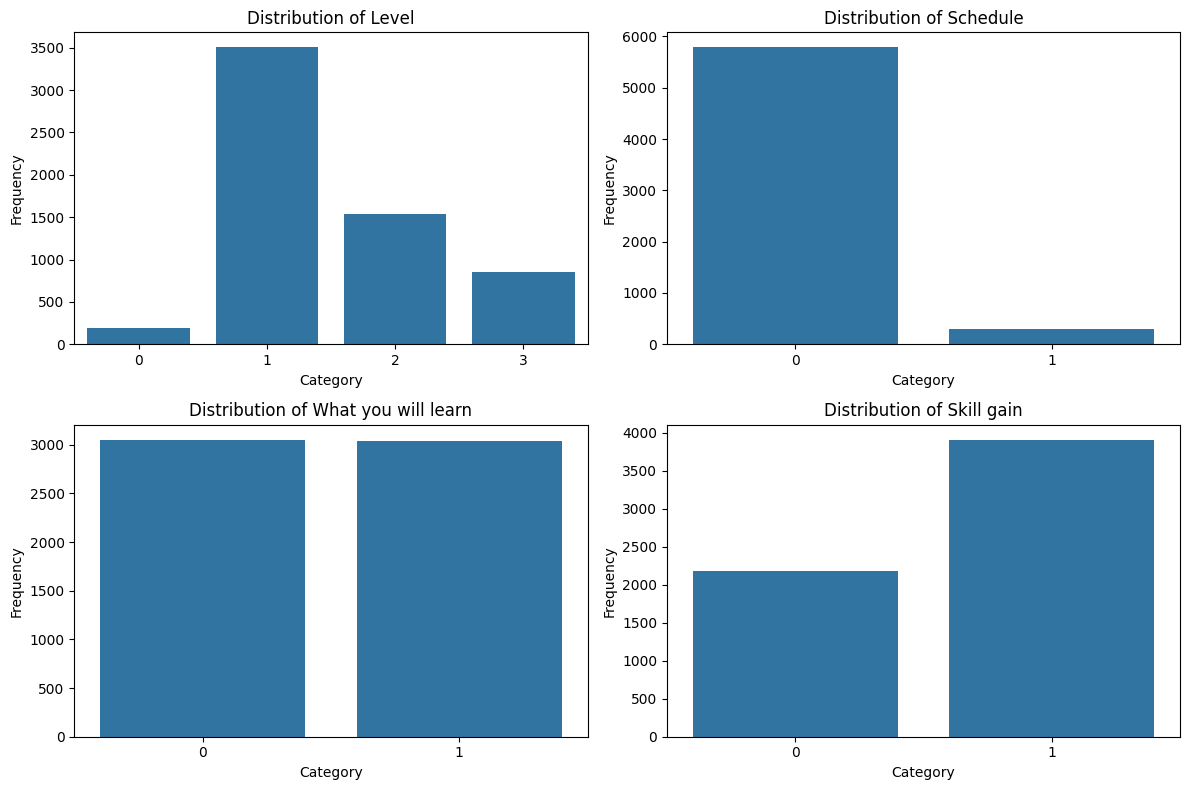

In [50]:
# Create a figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and plot the distribution
for i, column in enumerate(['Level', 'Schedule', 'What you will learn', 'Skill gain']):
    sns.countplot(x=column, data=df_test, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel('Category')
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

##### The distribution of "Schedule" is very inequal with more than 90% for one cartegory, the model will learn significanly more from those data and will have a bias for it

##### The distribution of "What you will learn" is ideal 50/50 aprox.

##### The distribution of "Skill gain" is 66/33 which is neither very bad, but not ideal, there will still be a bit of 

##### The distribution of "Level" is not quiet 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


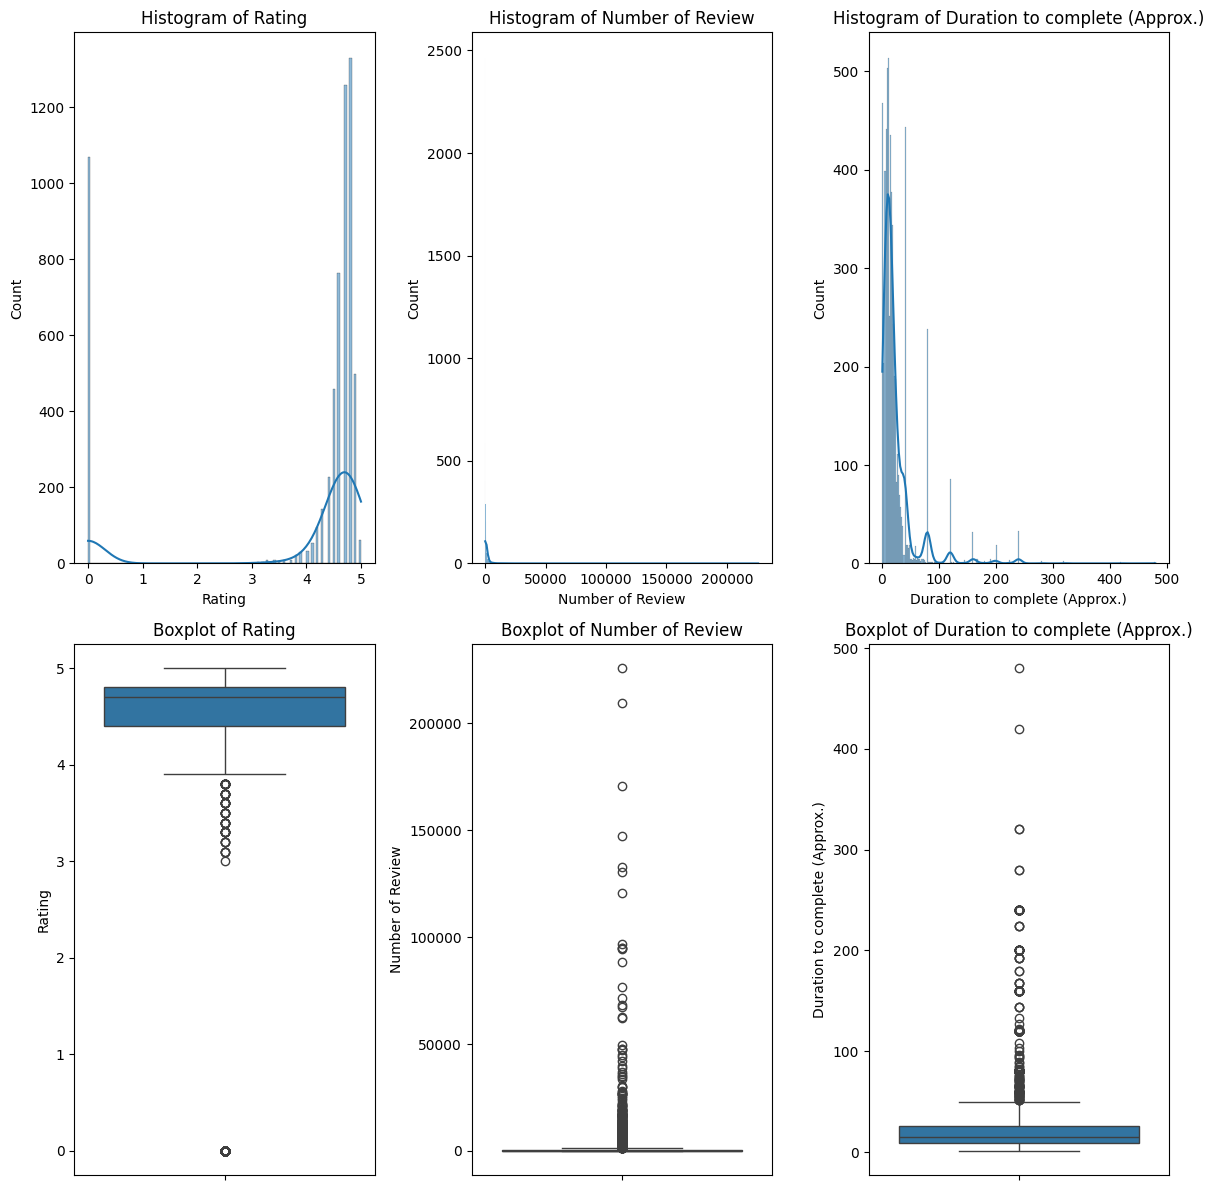

In [51]:
 # Plot histograms and box plots for numerical columns
numerical_columns = ['Rating', 'Number of Review', 'Duration to complete (Approx.)']

plt.figure(figsize=(12, 12))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_test[column], kde=True)
    plt.title(f'Histogram of {column}')

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i + 3)
    sns.boxplot(y=df_test[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

##### The main values in the "Rating" are 0 and form 3 to 5, also the main ditribution of "Duration to complete" is from 0 to 100, also, judging by the box plot "Rating" has outliers

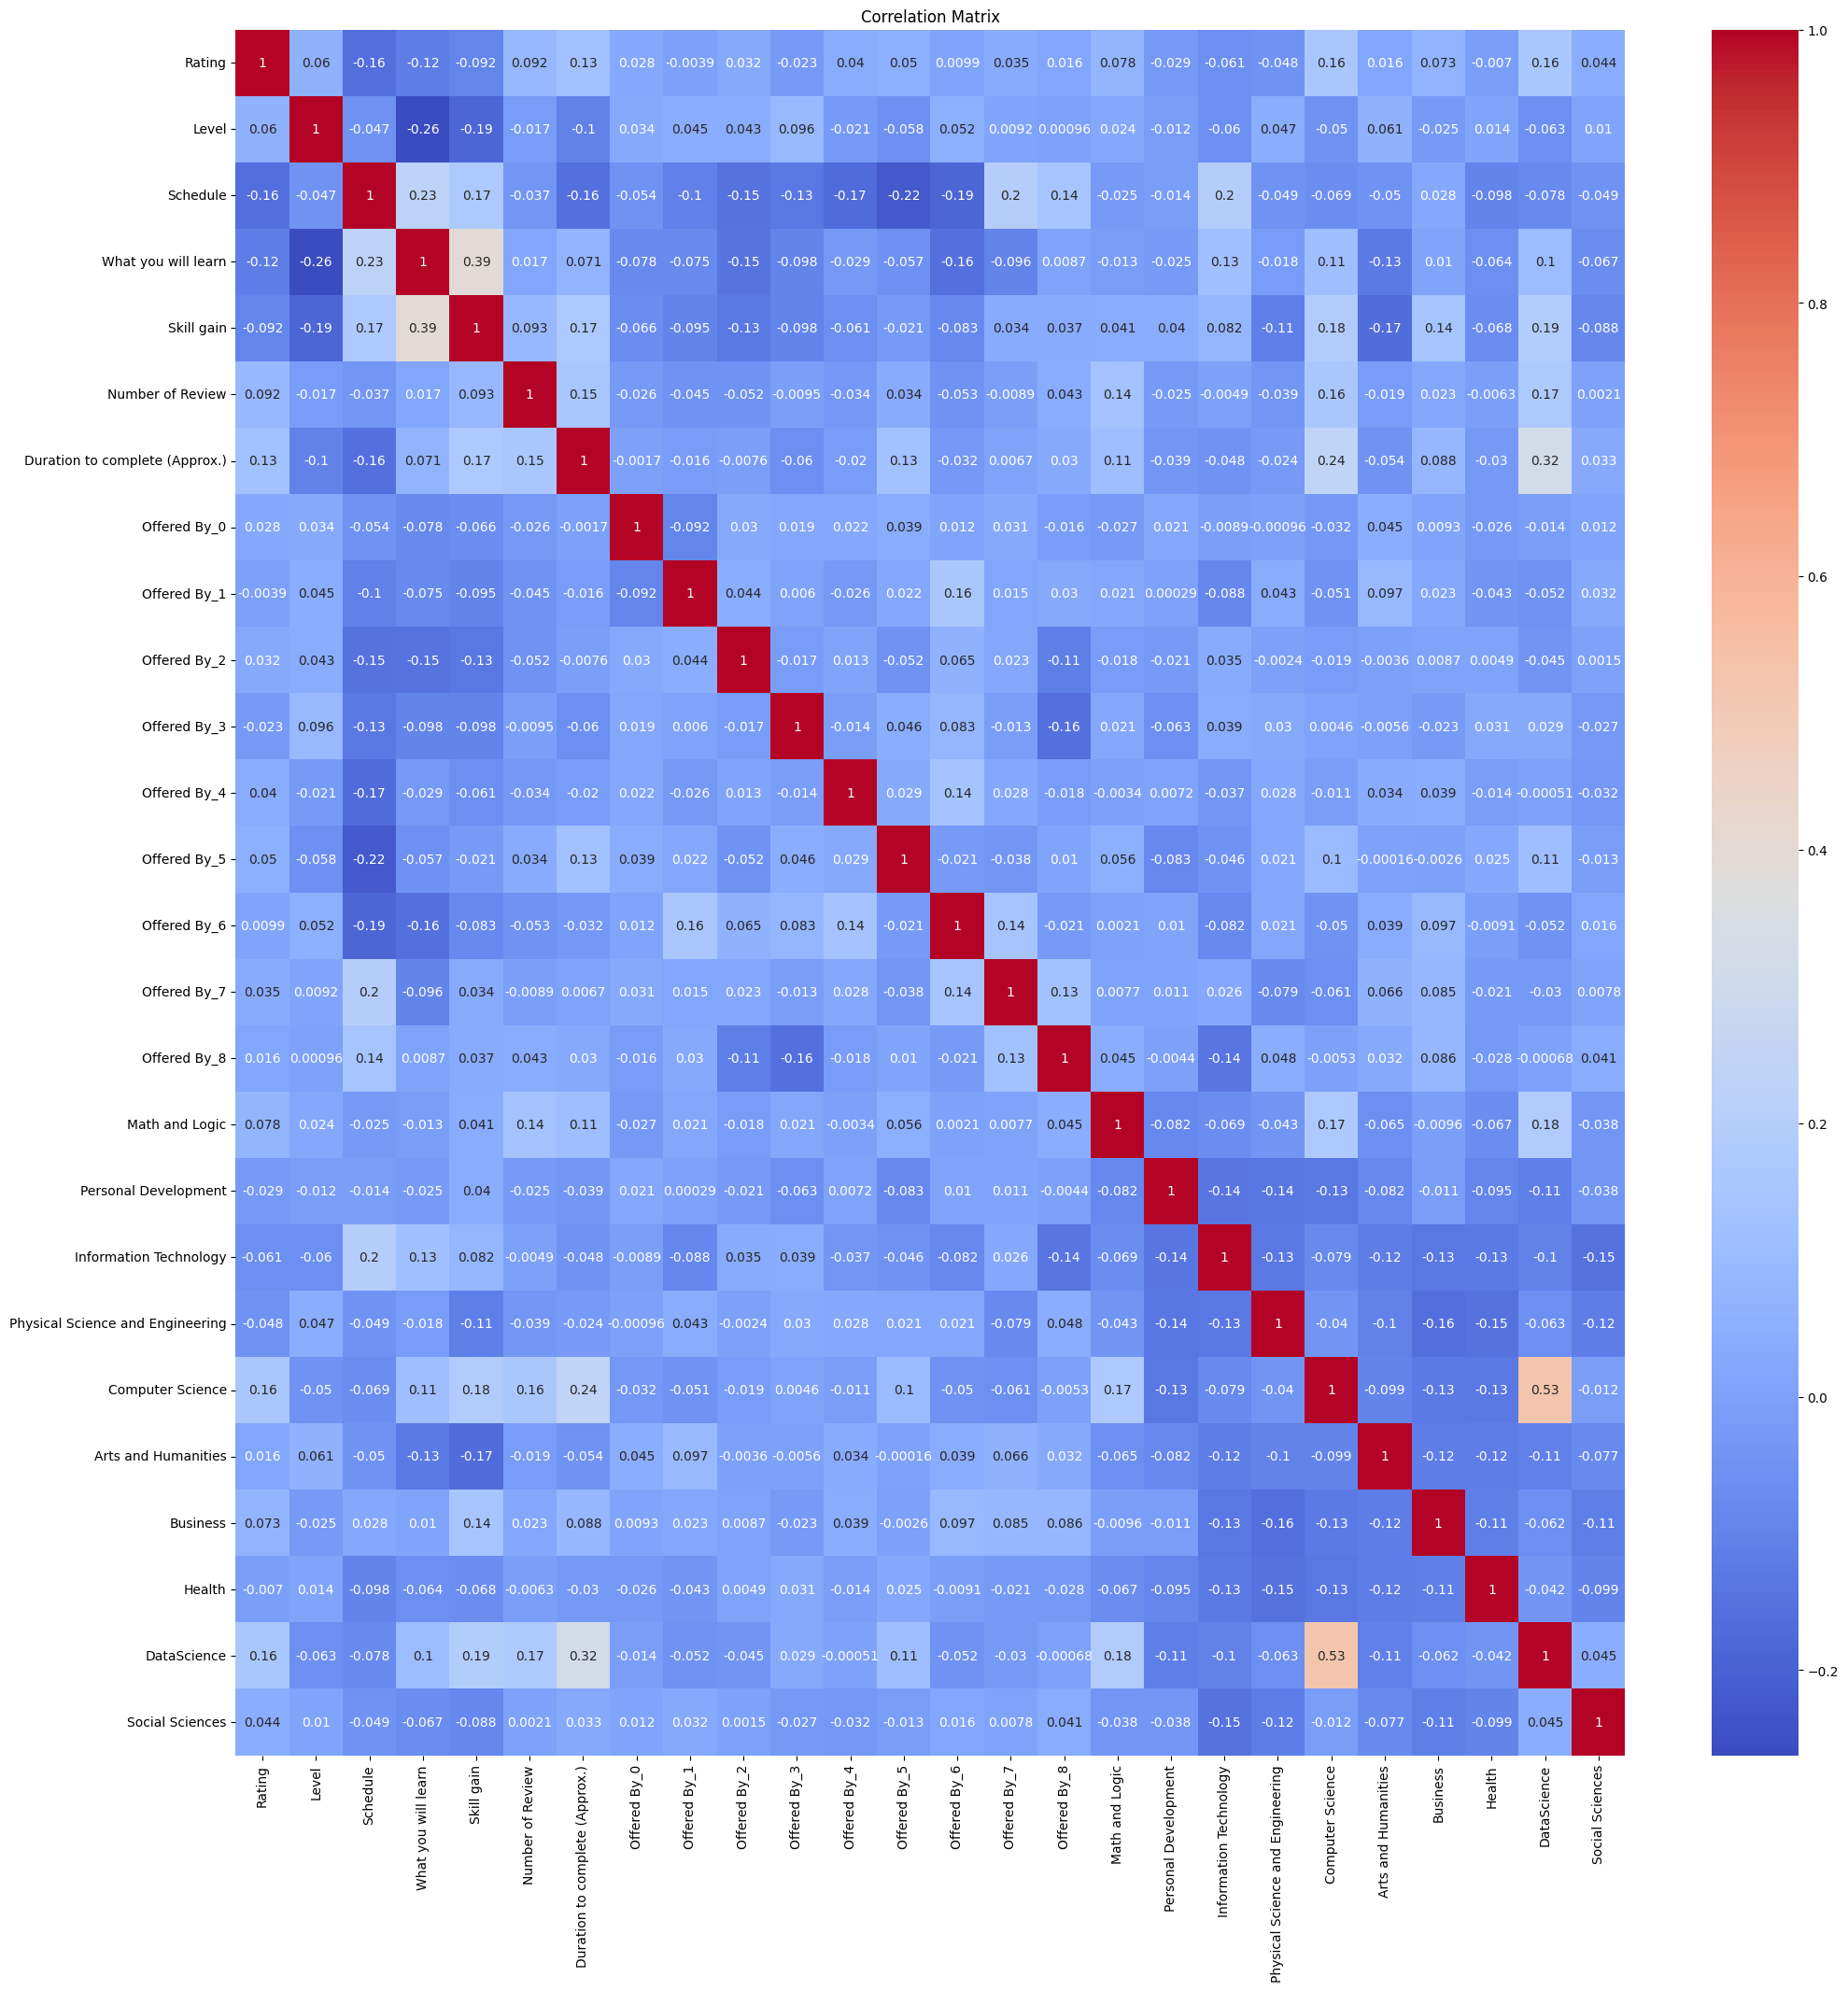

In [52]:
correlation_matrix = df_test.corr()

plt.figure(figsize=(24, 24))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

##### Judging by the correlation matrix, there are no strong correaltions between rows, which is a good thing

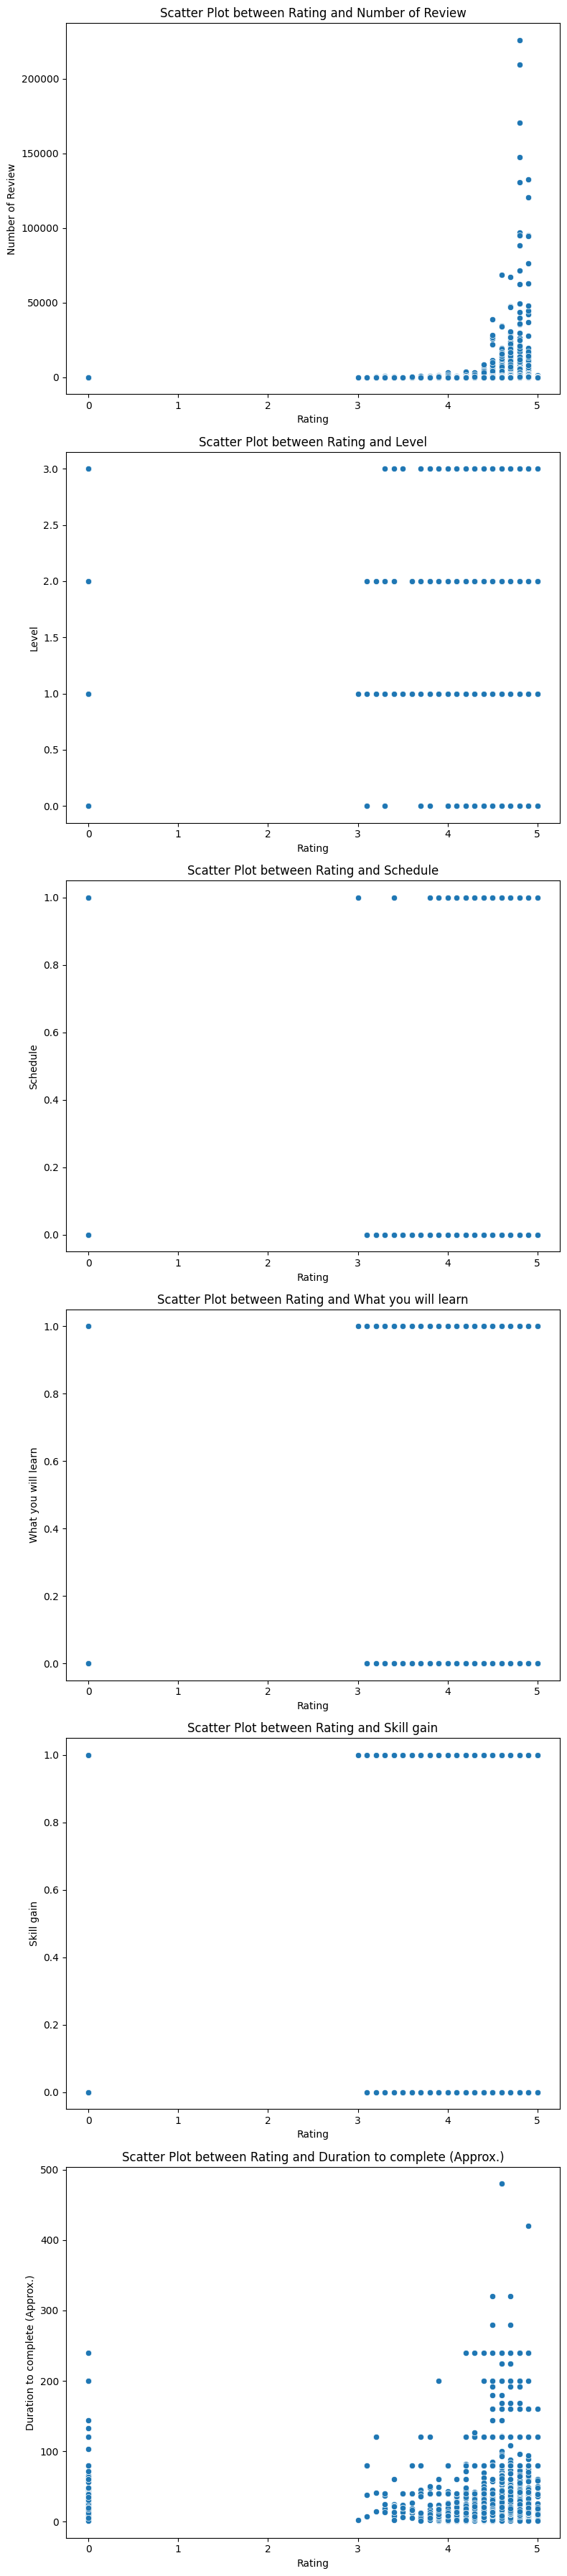

In [53]:
columns_for_scatter = ['Number of Review', 'Level', 'Schedule', 'What you will learn', 'Skill gain', 'Duration to complete (Approx.)']

fig, axs = plt.subplots(len(columns_for_scatter), figsize=(8, 6 * len(columns_for_scatter)))

for i, column in enumerate(columns_for_scatter):
    sns.scatterplot(x='Rating', y=column, data=df_test, ax=axs[i])
    axs[i].set_title(f'Scatter Plot between Rating and {column}')
    axs[i].set_xlabel('Rating')
    axs[i].set_ylabel(column)

plt.tight_layout()
plt.show()

##### If the number of reviews is 0 then the rating is 0 too, and this is a direct correlation, which is not the recommended, beacuse will affect the weights of the model too much, but in the same time, when removed, will just get the weight to 0, thus influencing the model, so I decided to remove the rows with 0 reviews

In [54]:
df_test = df_test[df_test['Rating'] != 0].reset_index(drop=True)

df_test

,Rating,Level,Schedule,What you will learn,Skill gain,Number of Review,Duration to complete (Approx.),Offered By_0,Offered By_1,Offered By_2,...,Math and Logic,Personal Development,Information Technology,Physical Science and Engineering,Computer Science,Arts and Humanities,Business,Health,DataScience,Social Sciences
0,4.8,2,0,1,1,15,16.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,4.9,2,0,0,0,247,13.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4.7,1,1,1,1,20,2.0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4.9,1,0,1,0,94,11.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4.6,1,0,1,0,231,45.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5020,4.8,3,0,0,0,89,12.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5021,4.8,1,0,0,0,289,14.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5022,4.9,2,0,0,0,250,12.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5023,4.0,3,0,0,0,10,8.0,1,1,0,...,0,1,0,0,0,0,0,0,0,0


In [55]:
df_test.describe()

,Rating,Level,Schedule,What you will learn,Skill gain,Number of Review,Duration to complete (Approx.),Offered By_0,Offered By_1,Offered By_2,...,Math and Logic,Personal Development,Information Technology,Physical Science and Engineering,Computer Science,Arts and Humanities,Business,Health,DataScience,Social Sciences
count,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000,...,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000,5025.000000
mean,4.649294,1.525572,0.034826,0.473035,0.621692,1603.039403,26.098889,0.054726,0.177910,0.315821,...,0.088756,0.147662,0.130945,0.123383,0.189453,0.079403,0.164975,0.158806,0.186269,0.164577
std,0.234054,0.790187,0.183357,0.499322,0.485013,7994.423736,34.824238,0.227468,0.382475,0.464888,...,0.284420,0.354800,0.337374,0.328909,0.391907,0.270394,0.371195,0.365531,0.389362,0.370835
min,3.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.600000,1.000000,0.000000,0.000000,0.000000,56.000000,9.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.700000,1.000000,0.000000,0.000000,1.000000,233.000000,16.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.800000,2.000000,0.000000,1.000000,1.000000,880.000000,28.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.000000,1.000000,1.000000,1.000000,225830.000000,480.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_test.drop(columns='Rating')
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data


,feature,VIF
0,Level,3.846819
1,Schedule,1.385804
2,What you will learn,2.314885
3,Skill gain,3.434162
4,Number of Review,1.115325
5,Duration to complete (Approx.),1.880795
6,Offered By_0,1.081311
7,Offered By_1,1.298466
8,Offered By_2,1.464668
9,Offered By_3,1.697001


##### Based VIF values, multicolinearity is not a problem in the dataset (the majority of values tend to 1, and the ones that are bigger do not exceed 4, thus are not that bad)

In [57]:
print("Percentage of outliers in each column:\n")
for column in df_test.columns:
    Q1 = df_test[column].quantile(0.25)
    Q3 = df_test[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers_iqr = ((df_test[column] < (Q1 - 1.5 * IQR)) | (df_test[column] > (Q3 + 1.5 * IQR)))
    percentage_iqr = outliers_iqr.mean() * 100
    print(f"{column}: {percentage_iqr:.2f}%")

Percentage of outliers in each column:

Rating: 5.71%
Level: 0.00%
Schedule: 3.48%
What you will learn: 0.00%
Skill gain: 0.00%
Number of Review: 13.13%
Duration to complete (Approx.): 9.41%
Offered By_0: 5.47%
Offered By_1: 17.79%
Offered By_2: 0.00%
Offered By_3: 0.00%
Offered By_4: 0.00%
Offered By_5: 0.00%
Offered By_6: 0.00%
Offered By_7: 0.00%
Offered By_8: 0.00%
Math and Logic: 8.88%
Personal Development: 14.77%
Information Technology: 13.09%
Physical Science and Engineering: 12.34%
Computer Science: 18.95%
Arts and Humanities: 7.94%
Business: 16.50%
Health: 15.88%
DataScience: 18.63%
Social Sciences: 16.46%


In [58]:
Q1 = df_test.quantile(0.25)
Q3 = df_test.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((df_test < (Q1 - 1.5 * IQR)) | (df_test > (Q3 + 1.5 * IQR))).sum().sum()
percentage_iqr = outliers_iqr / df_test.size * 100

print(f"Total percentage of outliers: {percentage_iqr:.2f}%")

Total percentage of outliers: 7.63%


#### Feature selection

In [59]:
feature_selection_models = [PValueSelector, BregmanDivergenceSelector, JensenShannonSelector]

selected_cols = {}

for selector in feature_selection_models:
    model = selector()
    cols = model.select(df_test, 'Rating')
    selected_cols[selector.__name__] = cols
    print(f"{selector.__name__}: {cols} => {len(cols)}")



PValueSelector: ['Level', 'Schedule', 'What you will learn', 'Skill gain', 'Duration to complete (Approx.)', 'Offered By_0', 'Offered By_1', 'Offered By_2', 'Offered By_3', 'Offered By_4', 'Offered By_5', 'Offered By_6', 'Offered By_7', 'Offered By_8', 'Math and Logic', 'Personal Development', 'Information Technology', 'Physical Science and Engineering', 'Computer Science', 'Arts and Humanities', 'Business', 'Health', 'Social Sciences'] => 23
BregmanDivergenceSelector: ['Level', 'Schedule', 'What you will learn', 'Skill gain', 'Offered By_0', 'Offered By_1', 'Offered By_2', 'Offered By_3', 'Offered By_4', 'Offered By_5', 'Offered By_6', 'Offered By_7', 'Offered By_8', 'Math and Logic', 'Personal Development', 'Information Technology', 'Physical Science and Engineering', 'Computer Science', 'Arts and Humanities', 'Business', 'Health', 'DataScience', 'Social Sciences'] => 23
JensenShannonSelector: ['What you will learn', 'Skill gain', 'Number of Review', 'Duration to complete (Approx.)',

In [60]:
pvalue_values = set(selected_cols['PValueSelector'])
bregman_values = set(selected_cols['BregmanDivergenceSelector'])
jensen_values = set(selected_cols['JensenShannonSelector'])

common_values = pvalue_values.intersection(bregman_values, jensen_values)

print(f"Common values: {common_values} => {len(common_values)}")


Common values: {'Offered By_4', 'Offered By_2', 'Skill gain', 'Offered By_1', 'Offered By_3', 'Offered By_8', 'Offered By_7', 'Personal Development', 'Physical Science and Engineering', 'What you will learn', 'Offered By_6', 'Information Technology', 'Offered By_5', 'Computer Science', 'Business', 'Health', 'Social Sciences'} => 17


##### There are 17 common values between them all, and those are the columns for the keywords and offered by, but PValueSelector and BregmanDivergenceSelector both return 23 values from 25, which makes us understand that the selected features are all important and present usefull information for training a model, thus I will use them all further.

##### Defining functions for outlier detection and removal

In [61]:
def remove_outliers_isolation_forest(df, target_column):
    iso_forest = IsolationForest(contamination=0.1, random_state=42)
    iso_outliers = iso_forest.fit_predict(df[[target_column]])
    iso_mask = iso_outliers != -1  # Keep the inliers
    return df[iso_mask]

In [62]:
def remove_outliers_elliptic_envelope(df, target_column):
    elliptic_env = EllipticEnvelope(contamination=0.1, random_state=42)
    env_outliers = elliptic_env.fit_predict(df[[target_column]])
    env_mask = env_outliers != -1  # Keep the inliers
    return df[env_mask]

In [63]:
def remove_outliers_local_outlier_factor(df, target_column):
    lof = LocalOutlierFactor(contamination=0.1)
    lof_outliers = lof.fit_predict(df[[target_column]])
    lof_mask = lof_outliers != -1  # Keep the inliers
    return df[lof_mask]

In [64]:
def remove_outliers_one_class_svm(df, target_column):
    one_class_svm = OneClassSVM(nu=0.1)
    svm_outliers = one_class_svm.fit_predict(df[[target_column]])
    svm_mask = svm_outliers != -1  # Keep the inliers
    return df[svm_mask]

In [65]:
def remove_outliers_z_score(df, target_column):
    z_scores = (df[target_column] - df[target_column].mean()) / df[target_column].std()
    z_mask = z_scores.abs() < 3  # Keep the inliers
    return df[z_mask]

##### Defining the function for PCA

In [66]:
def PCA_decomposition(df, target_column, n_components=2):
    pca = PCA(n_components=n_components)
    pca.fit(df.drop(columns=target_column))
    return pca.transform(df.drop(columns=target_column))

##### Defining functions for training the models

In [67]:
def train_linear_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    return np.sqrt(mean_squared_error(y_test, y_pred))

def train_decision_tree(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
    dt = DecisionTreeRegressor(random_state=21)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    return np.sqrt(mean_squared_error(y_test, y_pred))

def train_knn(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    return np.sqrt(mean_squared_error(y_test, y_pred))

def train_random_forest(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
    rf = RandomForestRegressor(random_state=21)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    return np.sqrt(mean_squared_error(y_test, y_pred))

def train_svm(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
    svr = SVR()
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_test)
    return np.sqrt(mean_squared_error(y_test, y_pred))

def train_xgboost(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
    xgb = XGBRegressor(random_state=21)
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)
    return np.sqrt(mean_squared_error(y_test, y_pred))

In [68]:
def train_models(X, y):
    results = {}
    scaled_X = StandardScaler().fit_transform(X)
    results['Linear Regression'] = train_linear_regression(scaled_X, y)
    results['Decision Tree'] = train_decision_tree(scaled_X, y)
    results['KNN'] = train_knn(scaled_X, y)
    results['Random Forest'] = train_random_forest(X, y)
    results['SVM'] = train_svm(scaled_X, y)
    results['XGBoost'] = train_xgboost(scaled_X, y)
    return results

def test_models(df, target_column):
    all_results = {}

    df_no_outliers = remove_outliers_isolation_forest(df, target_column)
    X = df_no_outliers.drop(columns=target_column)
    y = df_no_outliers[target_column]
    results = train_models(X, y)
    all_results['Isolation_Forest'] = results

    df_no_outliers = remove_outliers_elliptic_envelope(df, target_column)
    X = df_no_outliers.drop(columns=target_column)
    y = df_no_outliers[target_column]
    results = train_models(X, y)
    all_results['Elliptic_Envelope'] = results

    df_no_outliers = remove_outliers_local_outlier_factor(df, target_column)
    X = df_no_outliers.drop(columns=target_column)
    y = df_no_outliers[target_column]
    results = train_models(X, y)
    all_results['Local_Outlier_Factor'] = results

    df_no_outliers = remove_outliers_one_class_svm(df, target_column)
    X = df_no_outliers.drop(columns=target_column)
    y = df_no_outliers[target_column]
    results = train_models(X, y)
    all_results['One-Class_SVM'] = results

    df_no_outliers = remove_outliers_z_score(df, target_column)
    X = df_no_outliers.drop(columns=target_column)
    y = df_no_outliers[target_column]
    results = train_models(X, y)
    all_results['Z-Score'] = results

    X = df.drop(columns=target_column)
    y = df[target_column]
    results = train_models(X, y)
    all_results['Original'] = results

    components = [2, 4, 6, 8, 10]

    for n_components in components:
        df_pca = PCA_decomposition(df, target_column, n_components=n_components)
        X = df_pca
        y = df[target_column]
        results = train_models(X, y)
        all_results[f'PCA_{n_components}'] = results

    return all_results


In [69]:
test = test_models(df_test, 'Rating')

test

{'Isolation_Forest': {'Linear Regression': 0.1321846165028073,
  'Decision Tree': 0.17639036592381882,
  'KNN': 0.13582367452801916,
  'Random Forest': 0.12869718581862322,
  'SVM': 0.13305803648940695,
  'XGBoost': 0.13838257075453447},
 'Elliptic_Envelope': {'Linear Regression': 0.13202863886363306,
  'Decision Tree': 0.1785509305005401,
  'KNN': 0.13431954113394967,
  'Random Forest': 0.1265622225079391,
  'SVM': 0.13195771955336089,
  'XGBoost': 0.1373119599818916},
 'Local_Outlier_Factor': {'Linear Regression': 0.19671312106936342,
  'Decision Tree': 0.2658832220647838,
  'KNN': 0.20713331073691088,
  'Random Forest': 0.19421453315444545,
  'SVM': 0.20057309089217032,
  'XGBoost': 0.20625801962930168},
 'One-Class_SVM': {'Linear Regression': 0.1665100249594801,
  'Decision Tree': 0.21649770780548677,
  'KNN': 0.1713280286852494,
  'Random Forest': 0.16484339709035395,
  'SVM': 0.16846498171829938,
  'XGBoost': 0.17733244435839235},
 'Z-Score': {'Linear Regression': 0.1804025562462

In [70]:
test_df = pd.DataFrame.from_dict(test, orient='index')
test_df

,Linear Regression,Decision Tree,KNN,Random Forest,SVM,XGBoost
Isolation_Forest,0.132185,0.176390,0.135824,0.128697,0.133058,0.138383
Elliptic_Envelope,0.132029,0.178551,0.134320,0.126562,0.131958,0.137312
Local_Outlier_Factor,0.196713,0.265883,0.207133,0.194215,0.200573,0.206258
One-Class_SVM,0.166510,0.216498,0.171328,0.164843,0.168465,0.177332
Z-Score,0.180403,0.244202,0.184287,0.174606,0.181364,0.182082
Original,0.228050,0.304771,0.218640,0.212805,0.221997,0.224054
PCA_2,0.234466,0.321269,0.245388,0.253530,0.238989,0.254096
PCA_4,0.233490,0.331602,0.245928,0.234842,0.233635,0.245850
PCA_6,0.232486,0.318556,0.237470,0.219390,0.230694,0.234177
PCA_8,0.233066,0.299220,0.233691,0.215604,0.223884,0.226731


##### The best combination is the combination of Isolation Forest with Random Forest

##### Overall the best models are Random Forest and XGBoost

In [71]:
df_isolation_forest = remove_outliers_isolation_forest(df_test, 'Rating')

X = df_isolation_forest.drop(columns='Rating')
y = df_isolation_forest['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

rf = RandomForestRegressor(n_estimators=100)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Mean Absolute Error: 0.10320760749724374
Mean Squared Error: 0.016722067652823747
Root Mean Squared Error: 0.12931383395763868


##### This combination gives 90% accuracy

In [72]:
explainer = shap.TreeExplainer(rf, df_isolation_forest.drop(columns='Rating'))
shap_values = explainer.shap_values(df_isolation_forest.drop(columns='Rating'))

 99%|===================| 4510/4535 [02:26<00:00]        

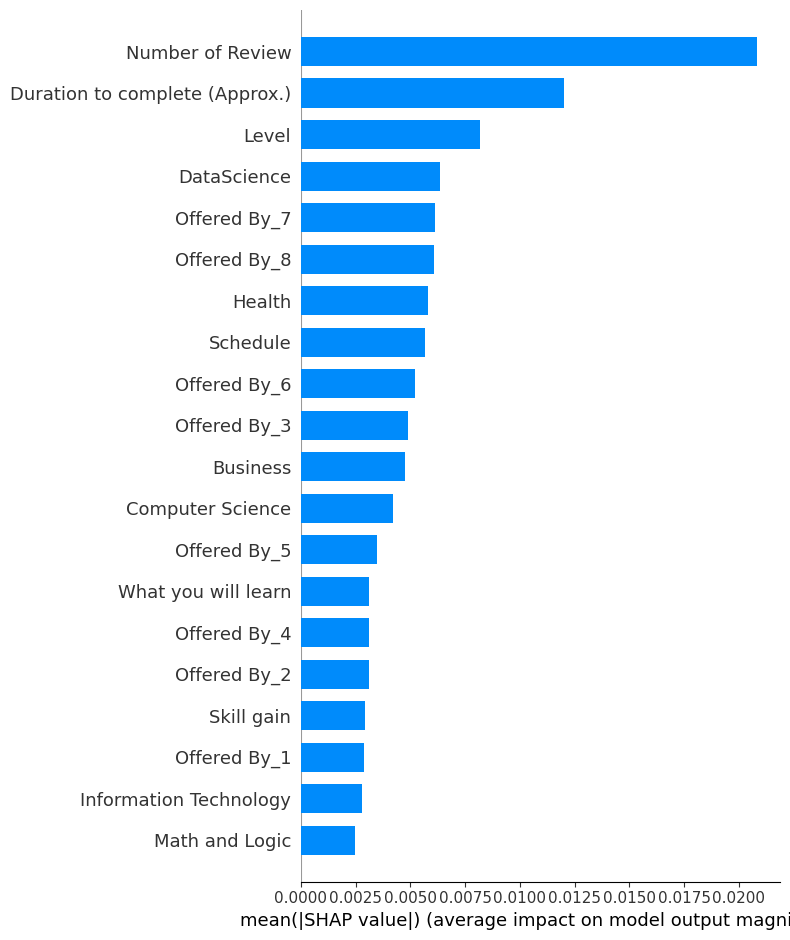

In [73]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

100%|===================| 4515/4535 [02:25<00:00]        

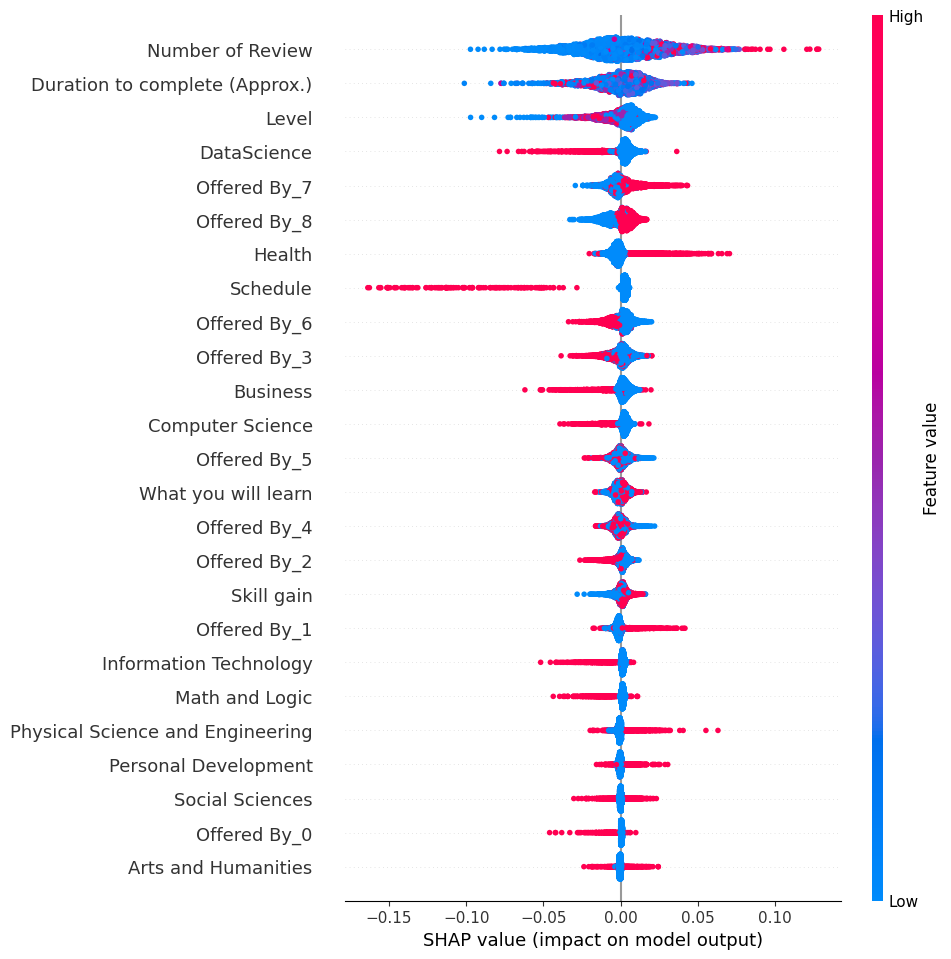

In [74]:
shap.plots.beeswarm(explainer(df_isolation_forest.drop(columns='Rating')), max_display=25)

##### The most important feature is the "Number of Review"

##### I will try to improve on it with some hyperparameter tuning

In [75]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
}

rf = RandomForestRegressor()
clf = GridSearchCV(rf, param_grid)

clf.fit(X_train, y_train)
best_params = clf.best_params_

rf = RandomForestRegressor(**best_params)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")


Mean Absolute Error: 0.10268217378314984
Mean Squared Error: 0.01639392241065856
Root Mean Squared Error: 0.1280387535500817


##### Creating a pipeline for all the manipulations needed to train the model

In [76]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(columns=self.columns)
    
class BinaryEncoderCustom(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        be = BinaryEncoder(cols=self.columns, drop_invariant=True)
        return be.fit_transform(X)
    
class MergeRows(BaseEstimator, TransformerMixin):
    def __init__(self, columns, aggregation_function):
        self.columns_ = columns
        self.aggregation_function = aggregation_function

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        columns = X.columns.to_list()
        return X.groupby([column for column in columns if column not in self.columns_], dropna=False).agg(self.aggregation_function).reset_index()
    
class OneHotEncoderCustom(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        new_columns = {}
        for value in unique_values:
            new_columns[value] = X[self.column].apply(lambda x: 1 if value in x else 0)

        return pd.concat([X] + [pd.Series(new_columns[col], name=col) for col in new_columns.keys()], axis=1).drop(columns=[self.column])
    
class SortCommaSeparatedColumn(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        for column in self.columns:
            X[column] = X[column].apply(lambda x: np.nan if pd.isnull(x) else ','.join(sorted(x.split(', '))))
        return X
    
class LabelEncoderCustom(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        le = LabelEncoder()
        for column in self.columns:
            X[column] = le.fit_transform(X[column])
        return X
    
class ReplaceNotSpecified(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        def replace_not_specified(value):
            if value == 'Not specified':
                return 0
            else:
                return 1

        for column in self.columns:
            X[column] = X[column].apply(replace_not_specified)
        return X
    
class IsolationForestCustom(BaseEstimator, TransformerMixin):
    def __init__(self, target_column):
        self.target_column = target_column

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        iso_forest = IsolationForest(contamination=0.1, random_state=42)
        iso_outliers = iso_forest.fit_predict(X[[self.target_column]])
        iso_mask = iso_outliers != -1  # Keep the inliers
        return X[iso_mask]
    
pipe = Pipeline([
    ('sort_comma_separated_column', SortCommaSeparatedColumn(columns=['What you will learn', 'Skill gain', 'Modules', 'Instructor', 'Offered By'])),
    ('merge_rows_1', MergeRows(columns=['Keyword'], aggregation_function={'Keyword': (lambda x: ','.join(set(x.dropna())))})),
    ('merge_rows_3', MergeRows(columns=['Keyword', 'Course Title'], aggregation_function={
        'Course Title': 'first',
        'Keyword': (lambda x: ','.join(set(x.dropna())))
    })),
    ('merge_rows_4', MergeRows(columns=['Keyword', 'Modules', 'Duration to complete (Approx.)', 'Offered By'], aggregation_function={
        'Modules': merge_values_ignore_nan,
        'Duration to complete (Approx.)': 'mean',
        'Offered By': (lambda x: max(x, key=len)),
        'Keyword': (lambda x: ','.join(set(x.dropna())))
    })),
    ('label_encoder', LabelEncoderCustom(columns=['Level', 'Schedule'])),
    ('replace_not_specified', ReplaceNotSpecified(columns=['What you will learn', 'Skill gain'])),
    ('binary_encoder', BinaryEncoderCustom(columns=['Offered By'])),
    ('one_hot_encoder', OneHotEncoderCustom(column='Keyword')),
    ('drop_columns', DropColumns(columns=['Course Title', 'Course Url', 'Modules', 'Instructor'])),
    ('isolation_forest', IsolationForestCustom(target_column='Rating')),
])

dff = pipe.fit_transform(df)

X = dff.drop(columns=['Rating'])
y = dff['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

rf = RandomForestRegressor(n_estimators=100)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Mean Absolute Error: 0.08964854946330139
Mean Squared Error: 0.01629989876873611
Root Mean Squared Error: 0.12767105689519495


##### In conclusion, RandomForest with IsolationForest perfoms the best, which is because they are both tree based. Also SVM and XGBoost performed very well, because they are not sensible to the linearity of the features. Also, the 'Number of Review' has a very big impact on the predictions, which can be explained by the human nature, because humans tend to attend courses with higher ratings, and they leave their reviews which created a positive feedback loop that makes the most popular things have the biggest ratings.

##### On another topic, I would like to thank the Sigmoid team for mentoring me, and especially my mentor Alex Clefos. I am profoundly thankfull for the gained knowledge and the sparked interest in Machine Learning.


##### P.S. I am sorry for not always respecting dealines, and I promise that I will improve my time management, to further exclude this king of errors.